In [23]:
import matplotlib.pyplot as plt

import cv2

import numpy as np
import pandas as pd

In [24]:
# Задание лаб2
# 1) нарисовать гистограмму
#     для gray
#     для цветной
# 2)
#     реализовать свою функцию автоконтрастирования
#     найти минимум и максимум и вычecть (5%) задать процент
#     для gray
#     для цветной

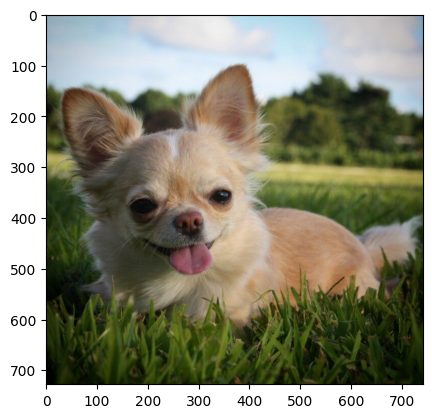

In [25]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

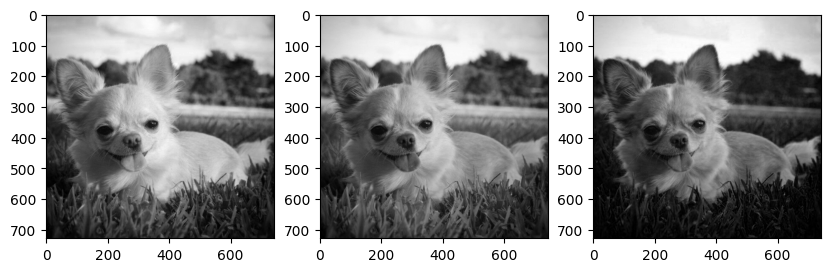

In [26]:
fig, axs  = plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(img[:,:,0:1], cmap='grey')
axs[1].imshow(img[:,:,1:2], cmap='grey')
axs[2].imshow(img[:,:,2:3], cmap='grey')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


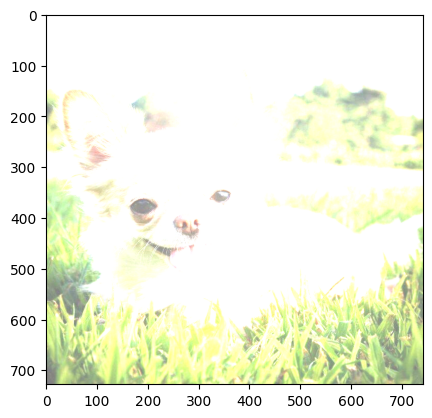

In [27]:
plt.imshow((img/255)*2.5 + 0.5)

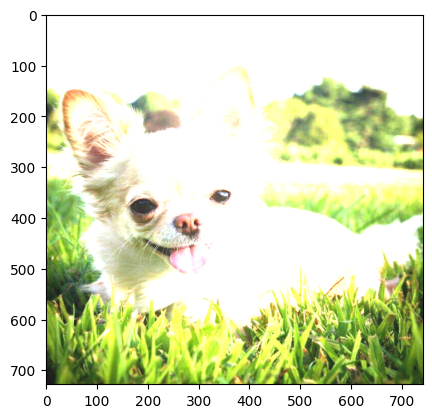

In [28]:
err_img = np.clip( ((img/255)*3 + 0.1), 0,1)
# err_img = (img/255)*0.25 + 0.8
plt.imshow(err_img)

In [29]:
img.shape
728*742

540176

In [30]:
class HistPlotter():
    @classmethod
    def RGB2HIST(cls,img):
        img = img if img.max() > 1 else cls.__scaler(img)
        img = img.mean(axis=2,keepdims=True).flatten()
        cls.__plot_hist(img,"RGB")

    @classmethod
    def RGB2HISTRGB(cls, img):
        img = img if img.max() > 1 else cls.__scaler(img)
        R_ch = img[:,:,0:1].flatten()
        G_ch = img[:,:,1:2].flatten()
        B_ch = img[:,:,2:3].flatten()
        
        cls.__plot_sub_hist(R_ch, G_ch, B_ch)
    
    @classmethod
    def GRAY2HIST(cls,img):
        img = img if img.max() > 1 else cls.__scaler(img)
        img = img.flatten()
        cls.__plot_hist(img)
    
    @classmethod
    def __create_hist_fig(cls,img,label=""):
        fig = plt.figure(figsize=(10,10))
        uniq = set(img.astype(int))
        raw = {x : 0 for x in uniq}
        
        for el in img.astype(int):
            raw[el]+=1
        to_hist = sorted(list(raw.items()))
        
        
        for pair in to_hist:
            plt.vlines(
                x=pair[0],
                ymin=0,
                ymax=pair[1],
            ).set_linewidth(7.0)
        plt.xlabel(label)
        return fig
    
    @classmethod
    def __plot_hist(cls,img,label="")->None:
        fig = cls.__create_hist_fig(img,label)
        plt.show()

    @classmethod
    def __plot_sub_hist(cls, R,G,B)->None:
        cls.__plot_hist(R,"R")
        plt.show()
        
        cls.__plot_hist(G,"G")
        plt.show()
        
        cls.__plot_hist(B,"B")
        plt.show()
        
    @classmethod
    def __scaler(cls,img):
        return np.clip(img, 0,255).astype("uint8")

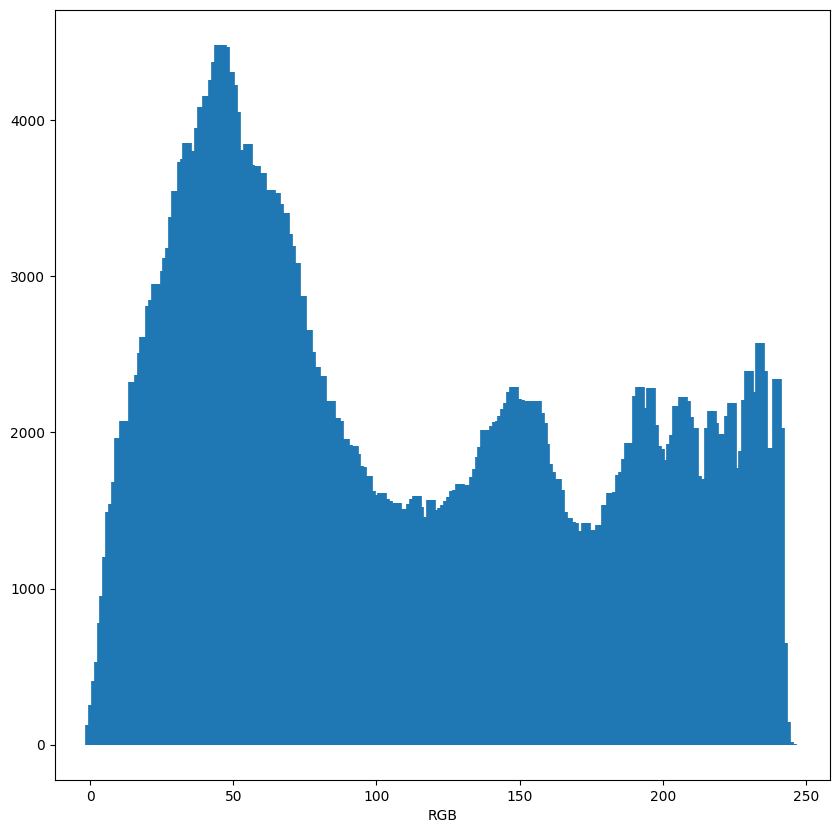

In [31]:
HistPlotter.RGB2HIST(img)

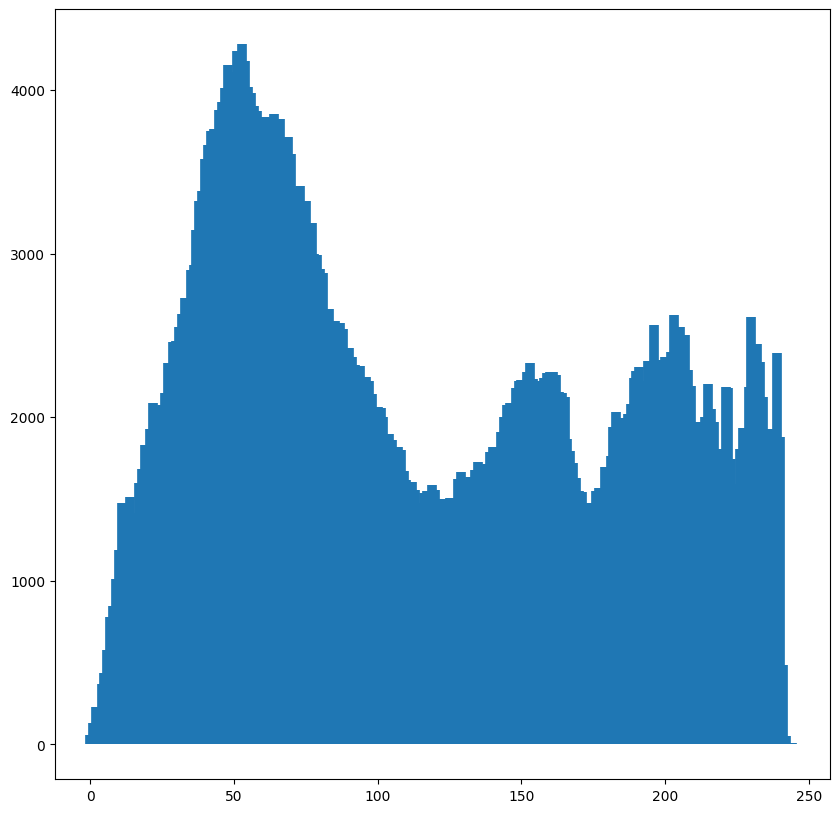

In [32]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
HistPlotter.GRAY2HIST(gray_img)

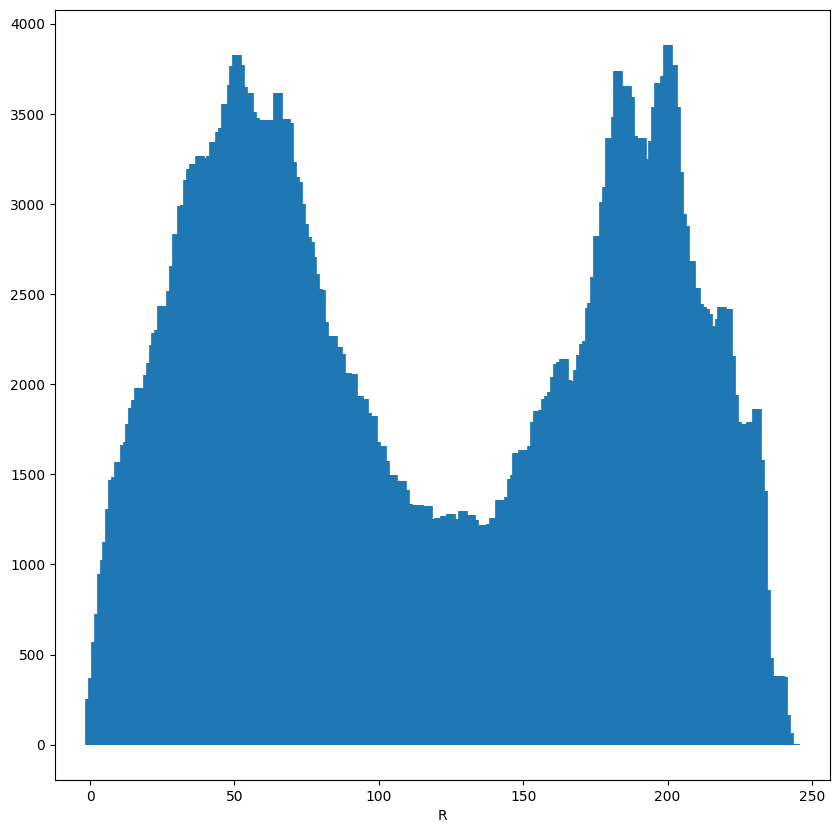

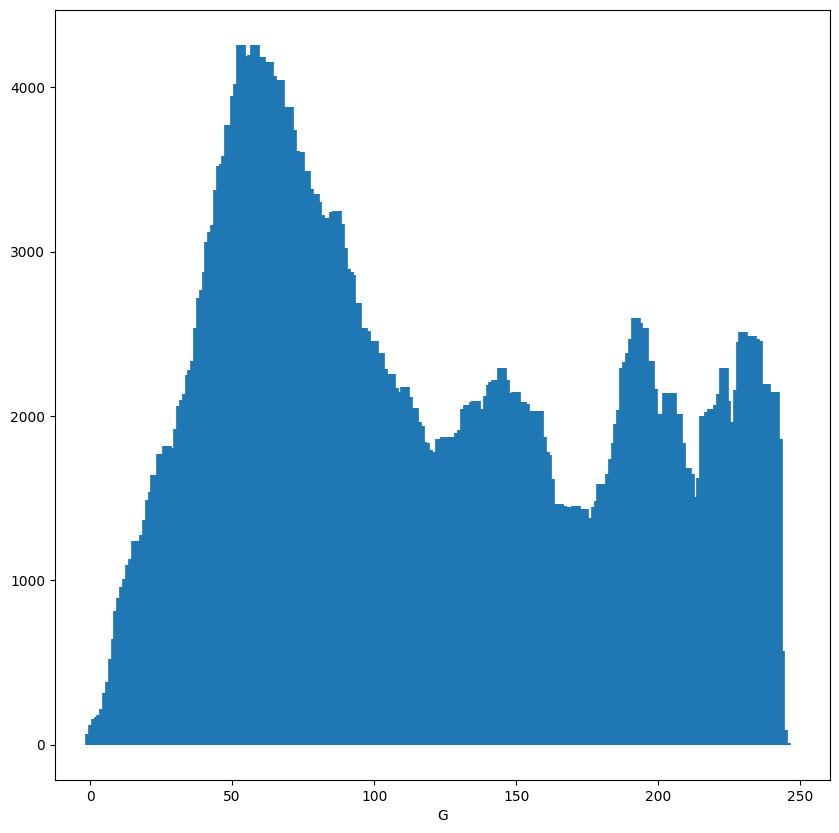

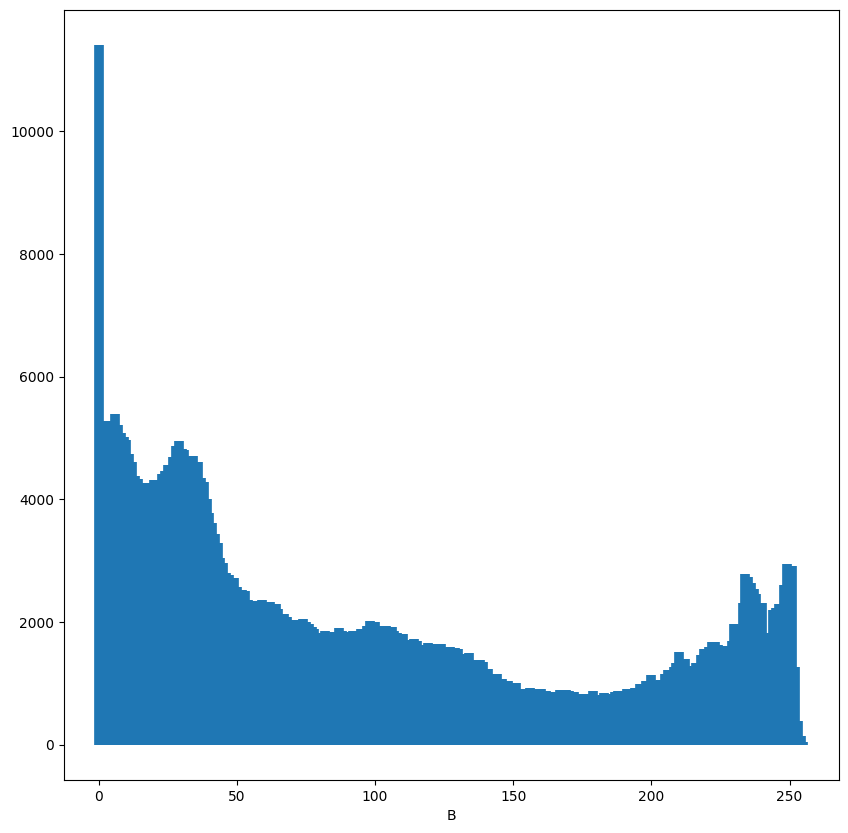

In [33]:
HistPlotter.RGB2HISTRGB(img)

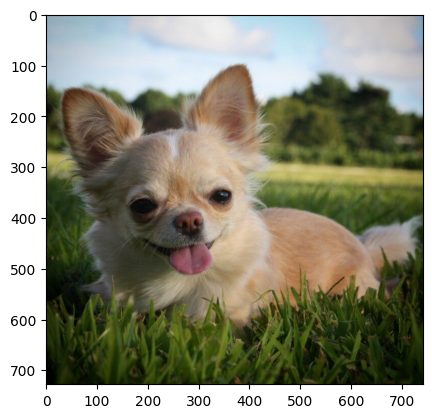

In [34]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


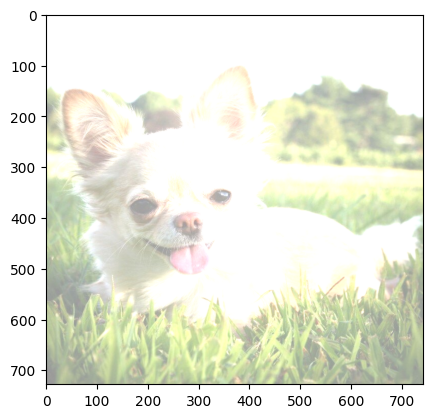

In [35]:
plt.imshow(img/255 + 0.6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


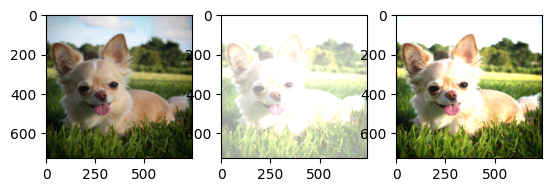

In [36]:
k = ( (img/255) + 0.6).copy()
for x in range(3):
    k[:,:,x:x+1] = (k[:,:,x:x+1] - k[:,:,x:x+1].min() ) * ( k[:,:,x:x+1].max() /  (k[:,:,x:x+1].max() -  k[:,:,x:x+1].min()) )
fig, ax = plt.subplots(1,3)
ax[0].imshow(img)
ax[1].imshow(np.clip(img/255 +0.6, 0, 1))
ax[2].imshow(k)

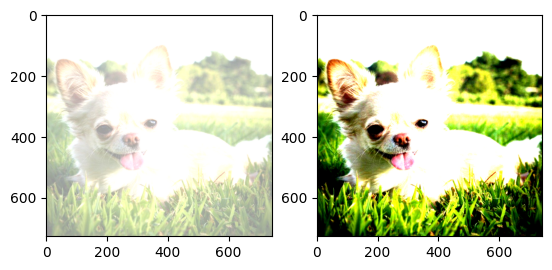

In [41]:
class AutoContrast():
    def __init__(self, shift_percentage):
        self.per = shift_percentage/100

    def auto_contrast(self,in_img):
        img = in_img.copy()
        for x in range(img.shape[2]):
            ax_ref = img[:,:,x:x+1]

            
            min_ref = ax_ref.min() + (self.per * ax_ref.mean())
            max_ref = ax_ref.max() - (self.per * ax_ref.mean())

            delta = (max_ref - min_ref)
            
            noise_delta = delta * self.per
            noise_min = min_ref + noise_delta
            noise_max = max_ref - noise_delta
            
            img[:,:,x:x+1] = np.clip(( ax_ref - noise_min ) * ( noise_max / delta ), 0, 1)
        return img

auto_cont = AutoContrast(10)
test_img = np.clip(img/255 + 0.6, 0,1)
a_cont_img = auto_cont.auto_contrast(test_img)
fig, ax = plt.subplots(1,2)
ax[0].imshow(test_img)
ax[1].imshow(a_cont_img)
plt.show()